Carlos Garcia - 21000475

### Liberias

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.initializers import GlorotUniform, GlorotNormal

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Datos

##### Obteniendo datos

In [4]:
data = pd.read_csv('./input/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
row = data.iloc[0, :].values
img = []
for i in range(0, 28):
    array = []
    for j in range(0, 28):
        array.append(row[i + (j*28)])
    img.append(array)
    
np.array(img)[0:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

##### Train-Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:].values, data['label'].values, test_size = 0.3, random_state = 123)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29400, 784)
(29400,)
(12600, 784)
(12600,)


##### Normalizacion, encoding y reshape

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

In [9]:
train_rows = X_train.shape[0]
X_train = np.expand_dims(X_train, axis = 0)
X_train = np.reshape(X_train, (train_rows, 28, 28, 1)) #Conv2D however expects four dimensions and this throws the error – simply because it also expects the channels dimension

test_rows = X_test.shape[0]
X_test = np.expand_dims(X_test, axis = 0)
X_test = np.reshape(X_test, (test_rows, 28, 28, 1))

y_train = np.expand_dims(y_train, axis = 1)
y_test = np.expand_dims(y_test, axis = 1)

In [10]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


##### Visualizacion

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


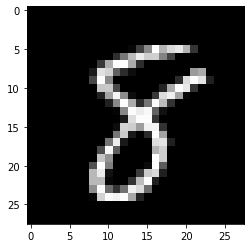

In [12]:
print(y_train[2])
plt.imshow(X_train[2], cmap = "gray")

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


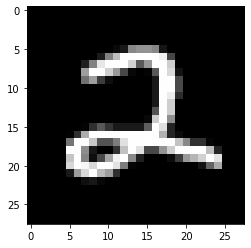

In [13]:
print(y_test[1])
plt.imshow(X_test[1], cmap = "gray")

### Modelos

##### Callbacks

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [15]:
callbacks = myCallback()

##### ANN

In [17]:
ann = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(units = 64, activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(units = 10, activation = 'softmax')
])

In [18]:
ann.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time
history = ann.fit(
                x = X_train, 
                y = y_train,
                epochs = 10,
                batch_size = 32,
                validation_split = 0.2,
                callbacks = [callbacks]
        )

Epoch 1/10
735/735 [==============================] - 18s 4ms/step - loss: 0.7273 - accuracy: 0.7896 - val_loss: 0.2508 - val_accuracy: 0.9265
Epoch 2/10
735/735 [==============================] - 3s 4ms/step - loss: 0.2263 - accuracy: 0.9367 - val_loss: 0.1908 - val_accuracy: 0.9422
Epoch 3/10
735/735 [==============================] - 7s 9ms/step - loss: 0.1675 - accuracy: 0.9536 - val_loss: 0.1707 - val_accuracy: 0.9481

Reached 95% accuracy so cancelling training!
Wall time: 28.2 s


In [21]:
ann.save('./models/MNIST_ann.h5')

##### CNN

In [22]:
cnn = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu', kernel_initializer = GlorotUniform()),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 64, activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(units = 10, activation = 'softmax')
])

In [23]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                173120    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
_________________________________________________________________


In [25]:
cnn.fit(
     x = X_train
    ,y = y_train
    ,epochs = 10
    ,batch_size = 32
    ,validation_split = 0.2
    ,callbacks = [callbacks]
)

Epoch 1/10
735/735 [==============================] - 9s 8ms/step - loss: 0.5912 - accuracy: 0.8305 - val_loss: 0.1338 - val_accuracy: 0.9594
Epoch 2/10
735/735 [==============================] - 6s 8ms/step - loss: 0.1070 - accuracy: 0.9694 - val_loss: 0.1003 - val_accuracy: 0.9706

Reached 95% accuracy so cancelling training!


In [26]:
cnn.save('./models/MNIST_cnn.h5')

### Predicciones

In [27]:
def predictNumbers(model, X_test, y_test):
    probs = model.predict(X_test)
    class_prob = np.max(probs, axis = 1)
    predictions = np.argmax(probs, axis = 1)
    labels = np.argmax(y_test, axis = 1)
    match = predictions == labels
    
    results = pd.DataFrame({'Class_prediction': predictions, 'Class_prob': class_prob, 'Label': labels, 'Matches': match})
    return results, probs    

In [28]:
def sampleImagePredictions(results, data, title = ''):
    #indexes = np.random.choice(list(results.index), size = 9, replace = False)
    indexes = np.random.randint(0, len(results), 9)
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (8, 8))
    m = 0
    
    for i in range(0, 3):
        for j in range(0, 3):
            y_hat = results.loc[indexes[m], 'Class_prediction']
            y = results.loc[indexes[m], 'Label']
            axs[i, j].imshow(data[indexes[m]], cmap = "gray")
            axs[i, j].set_title('Model Prediction = {}\nReal Label = {}'.format(y_hat, y))
            m += 1
            
            
    fig.suptitle(title)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    return indexes

##### ANN Predictions

In [29]:
ann_results, ann_probs = predictNumbers(ann, X_test, y_test)

In [30]:
ann_probs

array([[2.2169822e-07, 1.4759445e-03, 9.9283916e-01, ..., 5.4298539e-07,
        2.2302415e-06, 1.4339264e-08],
       [1.6771359e-05, 1.5921452e-06, 9.9575305e-01, ..., 2.8184589e-03,
        1.5326208e-04, 3.3108947e-05],
       [9.9997222e-01, 2.8997786e-09, 1.9084255e-05, ..., 4.0323322e-08,
        1.7349462e-08, 6.6655680e-06],
       ...,
       [2.9305067e-05, 1.5465149e-08, 4.1879783e-04, ..., 3.9294843e-02,
        3.3922141e-04, 9.3249339e-01],
       [7.5383283e-02, 6.4547571e-08, 9.2203909e-04, ..., 9.0773283e-06,
        5.9171892e-08, 7.7854536e-05],
       [2.8573206e-05, 5.0348518e-03, 2.1403027e-03, ..., 1.9772518e-03,
        7.1338322e-03, 1.2612875e-01]], dtype=float32)

In [31]:
ann_results

,Class_prediction,Class_prob,Label,Matches
0,2,0.992839,2,True
1,2,0.995753,2,True
2,0,0.999972,0,True
3,9,0.999236,9,True
4,4,0.452085,4,True
...,...,...,...,...
12595,9,0.605239,7,False
12596,8,0.942918,8,True
12597,9,0.932493,9,True
12598,6,0.914197,6,True


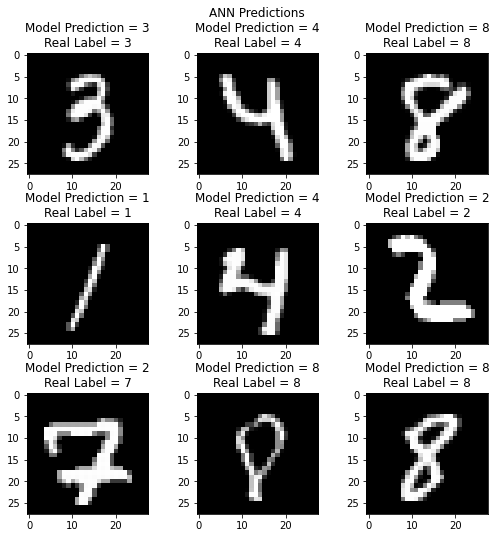

array([10102,  1615,  6121,  4298,  9776,  9455,  2414, 11885, 11210])

In [32]:
sampleImagePredictions(ann_results, X_test, 'ANN Predictions')

In [33]:
accuracy_ann = ann_results['Matches'].sum() / ann_results['Matches'].count()
print("Model ANN Accuracy = {}".format(accuracy_ann))

Model ANN Accuracy = 0.9508730158730159


##### CNN Predictions

In [34]:
cnn_results, cnn_probs = predictNumbers(cnn, X_test, y_test)

In [35]:
cnn_probs

array([[1.0981620e-07, 2.2150876e-03, 9.9603695e-01, ..., 2.5795073e-06,
        5.6604440e-06, 1.0174422e-08],
       [1.6153317e-07, 5.8733811e-08, 9.9991524e-01, ..., 2.2613982e-05,
        3.8695816e-06, 7.8372180e-09],
       [9.9990499e-01, 6.2675370e-10, 1.6937199e-06, ..., 7.8476165e-07,
        1.0613790e-05, 1.1036786e-05],
       ...,
       [1.1078123e-03, 1.5873836e-07, 1.9535017e-03, ..., 1.3419560e-01,
        1.7919110e-03, 8.5250098e-01],
       [9.1311060e-02, 8.4077772e-07, 3.8758983e-05, ..., 1.3056211e-05,
        6.6110661e-06, 4.1794519e-06],
       [3.3897652e-06, 3.3209235e-05, 1.3042415e-04, ..., 4.2784890e-05,
        2.9707293e-04, 1.0329592e-03]], dtype=float32)

In [36]:
cnn_results

,Class_prediction,Class_prob,Label,Matches
0,2,0.996037,2,True
1,2,0.999915,2,True
2,0,0.999905,0,True
3,9,0.999799,9,True
4,4,0.722457,4,True
...,...,...,...,...
12595,7,0.736935,7,True
12596,8,0.971703,8,True
12597,9,0.852501,9,True
12598,6,0.904721,6,True


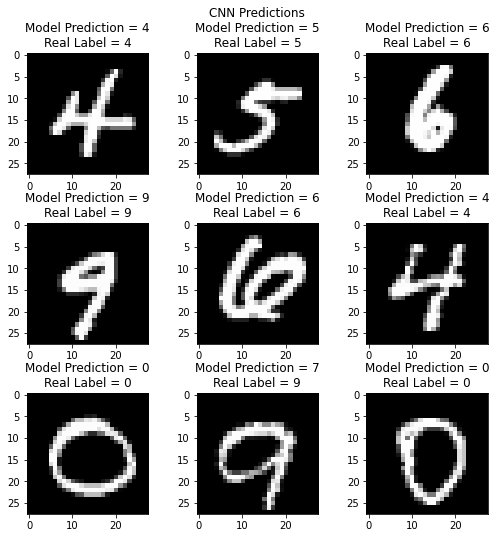

array([10786,  6041, 10222, 10779,  9978,   133,  2363,  2226, 12208])

In [37]:
sampleImagePredictions(cnn_results, X_test, 'CNN Predictions')

In [38]:
accuracy_cnn = cnn_results['Matches'].sum() / cnn_results['Matches'].count()
print("Model CNN Accuracy = {}".format(accuracy_cnn))

Model CNN Accuracy = 0.9681746031746031


### Comparacion modelos

In [39]:
comparing_data = pd.DataFrame({'Modelo': ['ANN', 'CNN'], 'Accuracy': [accuracy_ann, accuracy_cnn]})
comparing_data

,Modelo,Accuracy
0,ANN,0.950873
1,CNN,0.968175


### Conclusiones
- El modelo entrenado por medio de CNN presenta una acierto mayor que el modelo de ANN con valores de 96.82% y 95.09% respectivamente